In [2]:
import wfdb


from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from tqdm import tqdm

os.chdir('/Users/landonblakey/UVA/S4/DS6011/data')

In [109]:
ann.ann_len

2

In [108]:
dir(ann)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ann_len',
 'apply_range',
 'aux_note',
 'calc_cl_bytes',
 'calc_core_bytes',
 'calc_fs_bytes',
 'chan',
 'check_field',
 'check_field_cohesion',
 'check_fields',
 'compact_fields',
 'contained_labels',
 'convert_label_attribute',
 'create_label_map',
 'custom_labels',
 'description',
 'extension',
 'fs',
 'get_available_label_stores',
 'get_contained_labels',
 'get_custom_label_attribute',
 'get_label_fields',
 'get_undefined_label_stores',
 'label_store',
 'num',
 'record_name',
 'rm_attributes',
 'sample',
 'set_label_elements',
 'standardize_custom_labels',
 'subtype',
 'sym_to_aux',
 'symbol',
 'wr_ann_file',
 'wrann

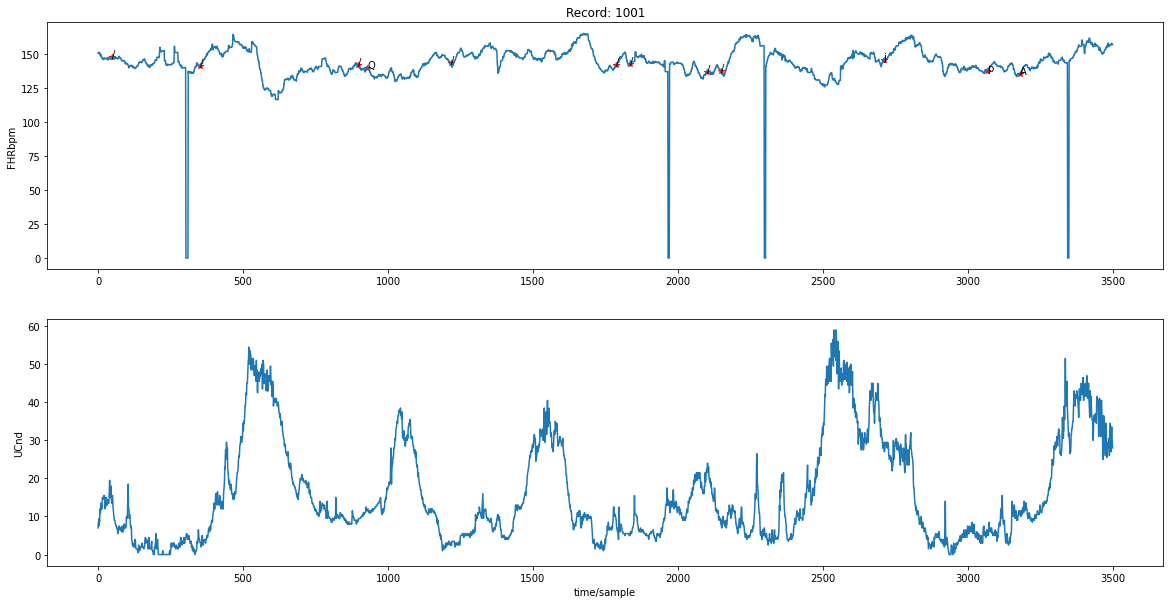

In [114]:
record = wfdb.rdrecord('./physionet_data/1001', sampfrom=0, sampto=3500)
# wfdb.plot.plot_wfdb(record)
ann = wfdb.rdann('./physionet_data/1001', 'hea',sampfrom=0, sampto=3500)

# wfdb.plot_items(signal=record.n_sig, fs=4,
#                     ann_samp=[ann.sample, ann.sample],
#                     figsize=(18,8))

wfdb.plot.plot_wfdb(record=record, annotation=ann, plot_sym=[True,True], figsize=(20,10))

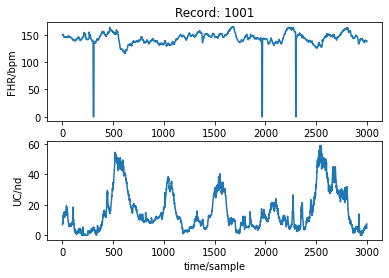

In [92]:
wfdb.plot.plot_wfdb(record)

In [ ]:
ann = wfdb.rdann('sample-data/100', 'atr', sampto=3000)

In [15]:
def get_all_records():
    rec_list = []
    for file in os.listdir("physionet_data/"):
        rec = file[:file.find('.')]
        try:
            rec = int(rec)
            rec_list.append(rec)
        except:
            pass
    rec_list = [str(i) for i in rec_list]
    return rec_list

def create_signals_database(rec):
    sample = wfdb.rdsamp("physionet_data/%s" % rec)
    df = pd.DataFrame(sample[0], columns=['FHR','UC'])
    df.index.name = 'seconds'
    df.to_csv('database/signals/%s.csv' % rec)
    
    
def create_ann_dataframe(rec):
    sample = wfdb.rdsamp("physionet_data/%s" % rec)
    ann = sample[1]['comments'][1:]
    ann_dic = {}
    for a in ann:
        if '--' in a:
            ann.remove(a)

    for a in ann:
        key = a[:a.find('  ')]
        if a.find('  ') == -1:
            key = a[:a.find(' ')]
        inv = a[::-1]
        value = inv[:inv.find(' ')][::-1]
        value = float(value)
        ann_dic[key] = [value]
        
    df1 = pd.DataFrame.from_dict(ann_dic).T
    df1 = df1.rename(columns={0:rec})
    return df1

def append_ann_dataframes(df,df1):
    rec = df1.columns[0]
    df[rec] = df1[rec]
    return df

In [16]:
df = pd.DataFrame()
for rec in tqdm(get_all_records()):
    create_signals_database(rec)
    df = append_ann_dataframes(df,create_ann_dataframe(rec))
df.to_csv('database/ann_db.csv')

  9%|███▌                                    | 100/1104 [00:05<00:48, 20.64it/s]/var/folders/ch/d9scct7n1y30kqjyb9_tp4jc0000gn/T/ipykernel_40783/2773049072.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[rec] = df1[rec]
100%|███████████████████████████████████████| 1104/1104 [00:56<00:00, 19.48it/s]


In [16]:
df1001 = pd.read_csv('./database/signals/1001.csv')

In [64]:
df1001.tail(100)

,seconds,FHR,UC
19100,19100,0.0,0.0
19101,19101,0.0,0.0
19102,19102,0.0,0.0
19103,19103,0.0,0.0
19104,19104,0.0,0.0
...,...,...,...
19195,19195,0.0,0.0
19196,19196,0.0,0.0
19197,19197,0.0,0.0
19198,19198,0.0,0.0


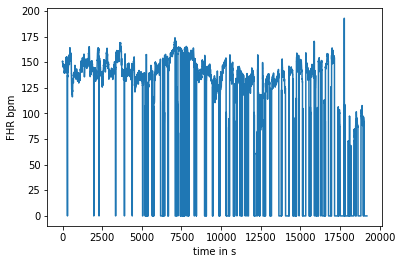

In [103]:
plt.plot(df1001.seconds, df1001.FHR)
# plt.plot(df1001.seconds, df1001.UC)
plt.xlabel("time in s")
plt.ylabel("FHR bpm")
plt.show()

In [27]:
x = df1001.seconds.to_numpy()
yf = df1001.FHR.to_numpy()
yc = df1001.UC.to_numpy()

In [ ]:
from scipy.interpolate import interp1d

f = interp1d(x, yf)



In [7]:
sample = wfdb.rdsamp("physionet_data/1001")

In [8]:
sample

(array([[150.5,   7. ],
        [150.5,   8.5],
        [151. ,   8.5],
        ...,
        [  0. ,   0. ],
        [  0. ,   0. ],
        [  0. ,   0. ]]),
 {'fs': 4,
  'sig_len': 19200,
  'n_sig': 2,
  'base_date': None,
  'base_time': None,
  'units': ['bpm', 'nd'],
  'sig_name': ['FHR', 'UC'],
  'comments': ['----- Additional parameters for record 1001',
   '-- Outcome measures',
   'pH           7.14',
   'BDecf        8.14',
   'pCO2         7.7',
   'BE           -10.5',
   'Apgar1       6',
   'Apgar5       8',
   '-- !NotReadyYet! Neonatology outcome measures !NotReadyYet!',
   'NICU days    0',
   'Seizures     0',
   'HIE          0',
   'Intubation   0',
   'Main diag.   0',
   'Other diag.  0',
   '-- Fetus/Neonate descriptors',
   'Gest. weeks  37',
   'Weight(g)    2660',
   'Sex          2',
   '-- Maternal (risk-)factors',
   'Age          32',
   'Gravidity    1',
   'Parity       0',
   'Diabetes     1',
   'Hypertension 0',
   'Preeclampsia 0',
   'Liq. praecox 1'

In [13]:
dir(record)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adjust_datetime',
 '_arrange_fields',
 'adc',
 'adc_gain',
 'adc_res',
 'adc_zero',
 'base_counter',
 'base_date',
 'base_time',
 'baseline',
 'block_size',
 'byte_offset',
 'calc_adc_params',
 'calc_checksum',
 'check_field',
 'check_field_cohesion',
 'check_read_inputs',
 'check_sig_cohesion',
 'checksum',
 'comments',
 'convert_dtype',
 'counter_freq',
 'd_signal',
 'dac',
 'e_d_signal',
 'e_p_signal',
 'file_name',
 'fmt',
 'fs',
 'get_write_fields',
 'get_write_subset',
 'init_value',
 'n_sig',
 'p_signal',
 'record_name',
 'samps_per_frame',
 'set_d_features',
 'set_default',
 'set_defaults',
 'set_p_features',
 '

In [14]:
record.skew

[None, None]

In [18]:
import h5py

In [26]:
filename = "/Users/landonblakey/UVA/S4/DS6011/models/CTG_nodel_weight.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = dict(f[a_group_key])

Keys: <KeysViewHDF5 ['model_weights', 'optimizer_weights']>


In [27]:
type(data)

dict

In [31]:
data['activation']

<Closed HDF5 group>

In [32]:
f = h5py.File(filename, "r")

In [33]:
f.keys()

<KeysViewHDF5 ['model_weights', 'optimizer_weights']>

In [34]:
f['optimizer_weights'].keys()

<KeysViewHDF5 ['Adam']>